In [4]:

import numpy as np
import pandas as pd #To read the dataset
import matplotlib.pyplot as plt #Plotting
import time
from IPython import display
%matplotlib inline

In [7]:

dataset = pd.read_csv('grad_desc.csv')
data = dataset.as_matrix()

numInstances = data.shape[0]

dataset.head()

,x,y
0,1,12.4
1,2,22.2
2,3,30.1
3,4,45.4
4,5,59.3


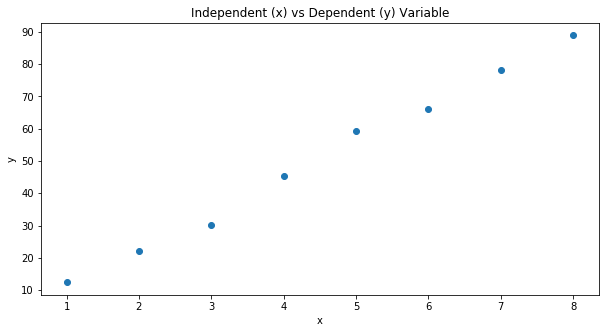

In [11]:
plt.figure(figsize=(10,5))
plt.title('Independent (x) vs Dependent (y) Variable')
plt.scatter(x=data[:,0],y=data[:,1])
plt.xlabel('x')
plt.ylabel('y')
plt.show()